<a href="https://colab.research.google.com/github/simranmallik/Math210/blob/Lab62/Copy_of_Lab_62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6.2

Goals:

* Graph two-variable functions
* Use built-in tools to approximate integrals.
* Use random sampling to approximate integrals.
* Measure the running time of a program

Here are your libraries.

In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

This code block defines five functions. You will be approximating the volume under the graph of $z=f(x,y)$.  The actual volume of each is also defined in this block.

In [4]:
# ryan
def f1(x,y):
  return np.sqrt(64-16*x**2-4*y**2)

volume1=32*np.pi

# Sim

def f2(x,y):
  return np.sqrt(36-4*x**2-9*y**2)

volume2=24*np.pi
# SHOULD BE 24*np.pi, not 18*np.pi

# abbey
def f3(x,y):
  return np.sqrt(16-4*x**2-y**2)

volume3=16*np.pi

def f4(x,y):
  return np.sqrt(36-9*x**2-y**2)

volume4=36*np.pi

def f5(x,y):
  return np.sqrt(100-25*x**2-4*y**2)

volume5=50*np.pi

# Questions
Write answers to these questions using code and text cells.  When you are satisfied, download and submit an .ipynb file to Gradescope.

## Q1
Create a nice graph of $z=f(x,y)$.  Your graph should have
* A title
* Labelled axes
* An appropriate domain and viewing window to see the entire region below this graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Z contains NaN values. This may result in rendering artifacts.


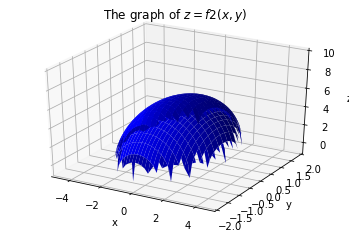

In [34]:
x,y=np.meshgrid(np.arange(-5,5,0.1),np.arange(-3,3,0.1))
# f2(x,y)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a figure
fig = plt.figure()

# Add an axes with different x, y and z limits
ax = plt.axes(projection='3d',xlim=(-5,5), ylim=(-2,2), zlim=(-1,10))

# Set a title.  
ax.set_title('The graph of $z=f2(x,y)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Draw the sphere (This is a method we didn't cover in this course. Don't worry if it makes no sense to you.)
ax.plot_surface(x, y, f2(x,y), color="blue")


plt.show()

## Q2
In a code cell
* Define x and y bounds (numbers and functions) for the domain of your function.
* Use `integrate.dblquad()` to compute the volume under this graph.  You can get your bounds using algebra (and perhaps by viewing your graph from Q1).
* Using the actual value defined above, add a line of code to compute and print the actual error in the `dblquad` computation.  

In a text cell
* Describe how the actual error compares to the approximate error bound.




In [9]:
# f2(x) = sqrt(36-4*x**2-9*y**2)

# The upper and lower x bounds.  These are variables (numbers)
xupper=2
xlower=-2


# The upper and lower y bounds. These are functions of x
def yupper(x):
  return np.sqrt(4-((4/9)*x**2))
def ylower(x):
  return -1*np.sqrt(4-((4/9)*x**2))


integral=integrate.dblquad(f2,xlower,xupper,ylower,yupper)

print(f'The integral is approximately {integral[0]}')
print(f'The error bound on this integral is approximately {integral[1]}')

The integral is approximately nan
The error bound on this integral is approximately 1.8784517306716393e-07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)


finish last part of q2

## Q3

In a code cell:
* Copy your code from the pre-lab that uses random sampling to approximate volume and plot the sample points.
* Adjust the range of random x, y, and z values to cover your graph.
* Adjust your `if` statement to determine which points are under your graph.  You should still be able to test this without using a square root.
* Produce a scatter plot of your points.
* Produce the volume approximation corresponding to your points.  Remember that the total volume of your sample space is not 4 anymore.

In [61]:
# define blank lists to hold the x and y coordinates of the points we generate
inPointsxValues=[]
inPointsyValues=[]
inPointszValues=[]
outPointsxValues=[]
outPointsyValues=[]
outPointszValues=[]

n=1000

# repeat n times
for i in range(n):
  # generate a random points in the 10x10 square
  x,y,z=np.random.uniform(-5,5),np.random.uniform(-1,2), np.random.uniform(-1,4)
  if z**2<np.sqrt(36-4*x**2-9*y**2):
    inPointsxValues.append(x)
    inPointsyValues.append(y)  
    inPointszValues.append(z)  
  #if the test failed, append to outPoints
  else:
    outPointsxValues.append(x)
    outPointsyValues.append(y) 
    outPointszValues.append(z)    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Z contains NaN values. This may result in rendering artifacts.


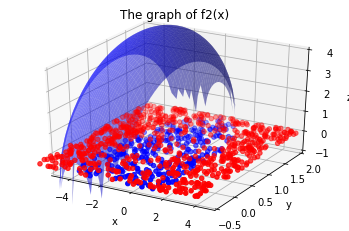

In [62]:

x,y=np.meshgrid(np.arange(-2,2,0.1),np.arange(-2,2,0.1))

def f2(x,y):
  return np.sqrt(36-4*x**2-9*y**2)


fig = plt.figure()
ax = plt.axes(projection='3d',xlim=(-5,5), ylim=(-.5,2), zlim=(-1,4))

# Set a title
ax.set_title('The graph of f2(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(x, y, f2(x,y), color="blue", alpha = .5)

ax.scatter(inPointsxValues,inPointsyValues,color="b")
ax.scatter(outPointsxValues,outPointsyValues,color="r")
plt.show()

In [64]:
print(f'The volume is approximately {len(inPointsxValues)/n*(8*2.5*4)}')

The volume is approximately 23.759999999999998


## Q4 

Copy your code from Q3 into a code cell. Then
* Remove the graphing steps.
* Add a line to compute the error in the apprximation, using the actual volume you were given.
* Add code at the beginning and end of the cell to compute and print the time to run.
* Run the cell for n=1000,10000,100000,1000000,10000000.  Record the errors and running times for each.

(If you're feeling clever, you may be able to run all these at once and output the data with a `for` loop.  That's fine)






Here is a table template you may use, if you want.



|Number of samples|Error|Running time|
---|---|---
|1000|put error here|put running time here|
|10000|put error here|put running time here|



In [73]:
import time


inPointsxValues=[]
inPointsyValues=[]
inPointszValues=[]
outPointsxValues=[]
outPointsyValues=[]
outPointszValues=[]



def repetition(n):
  
  for i in range(n):
    x,y,z=np.random.uniform(-5,5),np.random.uniform(-1,2), np.random.uniform(-1,4)
    if z**2<np.sqrt(36-4*x**2-9*y**2):
      inPointsxValues.append(x)
      inPointsyValues.append(y)  
      inPointszValues.append(z)
    else:
      outPointsxValues.append(x)
      outPointsyValues.append(y) 
      outPointszValues.append(z)    
  volume = len(inPointsxValues)/n*(8*2.5*4)
  error = volume - 24*np.pi
  return error

start1 = time.time()
print(repetition(1000))
end1 = time.time()
time1 = end1 - start1
print('time: ' + str(time1))

start2 = time.time()
print(repetition(10000))
end2 = time.time()
time2 = end2 - start2
print('time: ' + str(time2))

start3 = time.time()
print(repetition(100000))
end3 = time.time()
time3 = end3 - start3
print('time: ' + str(time3))

start4 = time.time()
print(repetition(1000000))
end4 = time.time()
time4 = end4 - start4
print('time: ' + str(time4))

start5 = time.time()
print(repetition(10000000))
end5 = time.time()
time5 = end5 - start5
print('time: ' + str(time5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


-51.55822368615503
time: 0.01176905632019043
-48.59822368615504
time: 0.10603761672973633
-48.28942368615503
time: 1.1039178371429443
-48.380383686155035
time: 10.910289525985718
-48.38772768615503
time: 108.18966126441956


## Q5

Predict the following, citing evidence from your tests in Q4:

* How high will `n` need to go to match the accuracy of `dblquad`? 
* How long (pick an appropriate time unit) would the program take to run with that value of `n`?  

## Q6 (Optional Math)

Consider the region $R$ enclosed by $y=4$ and $y=4x^2+z^2$. Its volume is: $$\iiint_R 1dV.$$
Try using `integrate.tplquad` to evaluate this integral.  See Section 6.4 if you want to recall how we set up this integral.  `tplquad` has 7 arguments. 

* The first argument is the integrand (a function of x, y and z)
* The next two arguments are the lower and upper x bounds (numbers)
* The next two arguments are the lower and upper y bounds (functions of x)
* The last two arguments are the lower and upper z bounds (functions of x and y)

## Q7 (Optional Programming)

In Q4 we removed the graphing for speed, but we could make this run even faster by removing the lists entirely.  Rewrite the code to increment a counter each time the point lies in the test region instead of saving the coordinates to an (eventually enormous) list.

How much does this help your runtimes?